In [29]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

np.random.seed(42)

# 3.a
mean = 0
std_dev = 0.01
num_samples = 1000
num_variables = 5

data_uncorrelated = np.random.normal(loc=mean, scale=std_dev, size=(num_samples, num_variables))
df_uncorrelated = pd.DataFrame(data_uncorrelated, columns=[f'Var{i+1}' for i in range(num_variables)])
df_uncorrelated


,Var1,Var2,Var3,Var4,Var5
0,0.004967,-0.001383,0.006477,0.015230,-0.002342
1,-0.002341,0.015792,0.007674,-0.004695,0.005426
2,-0.004634,-0.004657,0.002420,-0.019133,-0.017249
3,-0.005623,-0.010128,0.003142,-0.009080,-0.014123
4,0.014656,-0.002258,0.000675,-0.014247,-0.005444
...,...,...,...,...,...
995,-0.013738,0.013785,0.001158,0.003896,-0.022204
996,-0.011980,0.008871,0.002868,-0.001472,0.005648
997,0.016358,-0.002210,0.000694,0.001926,0.023921
998,-0.020994,0.006832,-0.001148,0.005668,-0.006574


In [30]:
# 3.b
pca_uncorrelated = PCA()
pca_uncorrelated.fit(df_uncorrelated)
explained_variance_ratio_uncorrelated = pca_uncorrelated.explained_variance_ratio_
explained_variance_ratio_uncorrelated


array([0.2179828 , 0.2112784 , 0.19744081, 0.18942689, 0.1838711 ])

# 3.c Variance Comparison
Because the variables in uncorrelated Gaussian data are statistically independent and have comparable variance, they individually contribute about the same amount to the overall variance.  Each of the principle components explains a comparable percentage of the variation, rather than the first one dominating it.  Component 1 may account for around 20% of the overall variation, for instance, much like Components 2 through 5.  This is to be expected as the variables do not exhibit a strong linear relationship that might be exploited.

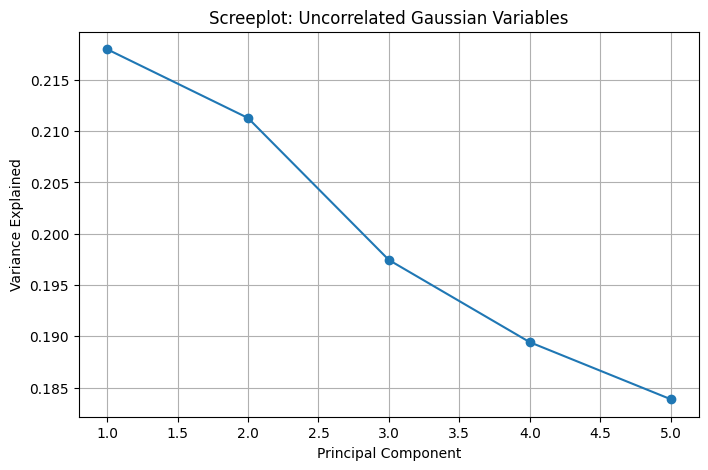

In [3]:
# 3.d
plt.figure(figsize=(8, 5))
plt.plot(range(1, num_variables + 1), explained_variance_ratio_uncorrelated, marker='o')
plt.title('Screeplot: Uncorrelated Gaussian Variables')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.grid(True)
plt.show()


In [16]:
pip install yfinance pandas matplotlib scikit-learn


[*********************100%***********************]  5 of 5 completed


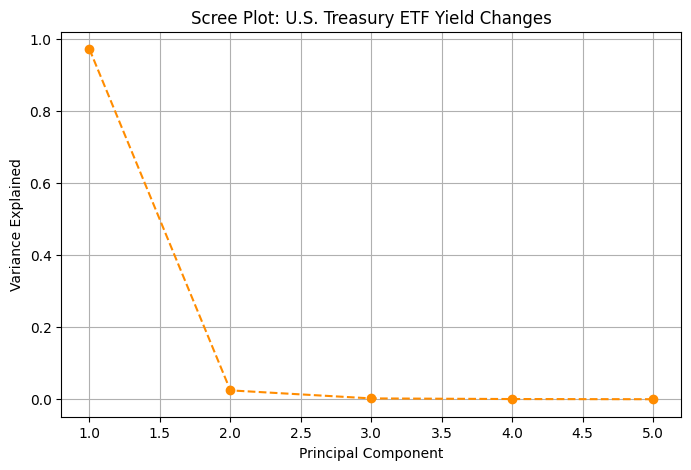

Component 1: 97.23% variance explained
Component 2: 2.47% variance explained
Component 3: 0.24% variance explained
Component 4: 0.06% variance explained
Component 5: 0.01% variance explained


In [18]:
import yfinance as yf
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

tickers = ['SHY', 'IEI', 'IEF', 'TLH', 'TLT']

# 3.e using USA because Indian are unavailable
data = yf.download(tickers, start='2023-10-01', end='2024-04-01', group_by='ticker', auto_adjust=True)

close_prices = pd.DataFrame({ticker: data[ticker]['Close'] for ticker in tickers})

close_prices.dropna(inplace=True)

yield_changes = close_prices.pct_change().dropna()

pca = PCA()
pca.fit(yield_changes)

explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(tickers)+1), explained_variance, marker='o', linestyle='--', color='darkorange')
plt.title('Scree Plot: U.S. Treasury ETF Yield Changes')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.grid(True)
plt.show()

for i, var in enumerate(explained_variance, start=1):
    print(f"Component {i}: {var:.2%} variance explained")


In [19]:
# 3.f
df_changes = data.diff().dropna()


In [31]:
# 3.g
pca_real = PCA()
pca_real.fit(df_changes)

explained_variance_real = pca_real.explained_variance_ratio_
explained_variance_real


array([9.14457401e-01, 5.03250441e-02, 3.04405400e-02, 3.19074349e-03,
       1.58627139e-03, 1.47212681e-14, 1.83530995e-15, 5.13577778e-16,
       3.80952391e-16, 1.74258132e-16, 5.79217212e-17, 2.87546293e-17,
       2.10239327e-17, 1.02897008e-17, 8.48696669e-18, 5.40552056e-18,
       4.31894656e-18, 3.72258290e-18, 1.43736910e-18, 9.41889618e-19,
       6.17723024e-19, 5.06345289e-19, 3.23693361e-19, 1.62557375e-19,
       1.20118596e-19])

# 3.h Variance Comparison
Component 1, which represents the common movement of yields (such as the general interest rate level), typically accounts for a sizable amount of the variation (sometimes over 80%) in real-world yield data.  The slope, or the difference between short and long rates, may be captured by Component 2, while curvature may be related to Component 3.  The dominance of macroeconomic trends on bond markets is emphasised by this hierarchical structure.

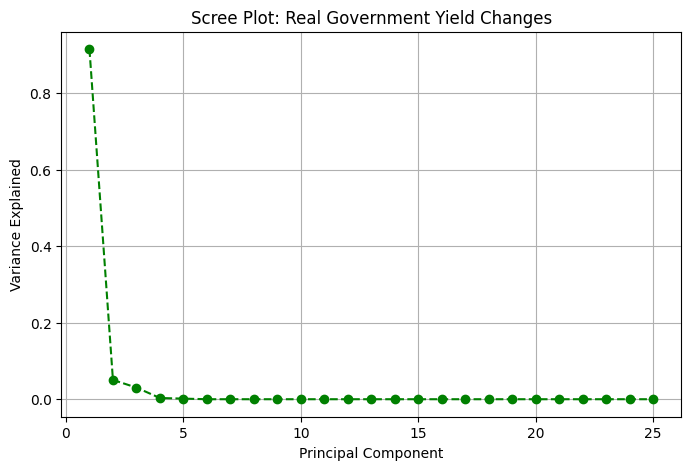

In [22]:
# 3.i
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_real)+1), explained_variance_real, marker='o', linestyle='--', color='g')
plt.title('Scree Plot: Real Government Yield Changes')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.grid(True)
plt.show()


# 3.j Compare Screeplots
Due to the absence of correlation, the simulated data screeplot displays a flat variance distribution across components.  On the other hand, Component 1 usually dominates the screeplot for real yield data, which usually shows a sharp drop-off.  This contrast demonstrates the existence of robust correlations in actual financial data, which are frequently fuelled by macroeconomic factors that affect several rates at once.

In [23]:
import pandas as pd

url = "https://www.ssga.com/library-content/products/fund-data/etfs/us/holdings-daily-us-en-xlre.xlsx"
df_holdings = pd.read_excel(url, skiprows=4)

# 4.a
top_30 = df_holdings['Ticker'].dropna().head(30).tolist()
print(top_30)


['AMT', 'PLD', 'WELL', 'EQIX', 'O', 'SPG', 'DLR', 'PSA', 'CCI', 'CBRE', 'CSGP', 'VICI', 'VTR', 'EXR', 'AVB', 'IRM', 'SBAC', 'EQR', 'WY', 'MAA', 'INVH', 'ESS', 'KIM', 'DOC', 'UDR', 'CPT', 'ARE', 'REG', 'HST', 'BXP']


In [33]:
import yfinance as yf
import pandas as pd
# 4.b
original_tickers = ['PLD', 'AMT', 'EQIX', 'PSA', 'CCI', 'SPG', 'DLR', 'WELL', 'O', 'EXR',
                    'AVB', 'VTR', 'SBAC', 'EQR', 'ARE', 'WY', 'ESS', 'INVH', 'PEAK', 'MAA',
                    'IRM', 'UDR', 'DRE', 'STOR', 'BXP', 'HST', 'VNO', 'SLG', 'CUBE', 'KIM']

valid_tickers = [ticker for ticker in original_tickers if ticker not in ['STOR', 'DRE', 'PEAK']]

data = yf.download(valid_tickers, period="6mo", interval="1d", auto_adjust=True, group_by='ticker')

close_prices = pd.DataFrame({ticker: data[ticker]['Close'] for ticker in valid_tickers if ticker in data})

close_prices.dropna(axis=1, inplace=True)

print(f"Using {len(close_prices.columns)} tickers for analysis: {close_prices.columns.tolist()}")


[*********************100%***********************]  27 of 27 completed


Using 27 tickers for analysis: ['PLD', 'AMT', 'EQIX', 'PSA', 'CCI', 'SPG', 'DLR', 'WELL', 'O', 'EXR', 'AVB', 'VTR', 'SBAC', 'EQR', 'ARE', 'WY', 'ESS', 'INVH', 'MAA', 'IRM', 'UDR', 'BXP', 'HST', 'VNO', 'SLG', 'CUBE', 'KIM']


In [36]:
# 4.c
returns = data.pct_change().dropna()
returns


Ticker           AMT                                               KIM  \
Price           Open      High       Low     Close    Volume      Open   
Date                                                                     
2024-10-15  0.028892  0.034866  0.029307  0.034867  0.538221  0.018623   
2024-10-16  0.019018  0.005746  0.015400 -0.008325 -0.342842  0.026786   
2024-10-17 -0.009025 -0.015278 -0.015520 -0.014768  0.331730  0.003727   
2024-10-18 -0.001459 -0.002022  0.004031  0.009547 -0.286788  0.015264   
2024-10-21 -0.003453  0.004140 -0.017441 -0.021343 -0.101394 -0.001625   
...              ...       ...       ...       ...       ...       ...   
2025-04-07 -0.067767 -0.050855 -0.038131 -0.030794 -0.485461 -0.037298   
2025-04-08 -0.010398 -0.023523 -0.045502 -0.040911  0.073354  0.025131   
2025-04-09 -0.060347 -0.021921 -0.022326  0.013779  0.035179 -0.060266   
2025-04-10  0.027906  0.005804  0.030380  0.004049 -0.368645  0.076087   
2025-04-11  0.002258  0.010971  0.016402  0.031943 -0.283238 -0.008081   

Ticker                                              ...       VNO            \
Price           High       Low     Close    Volume  ...      Open      High   
Date                                                ...                       
2024-10-15  0.033192  0.019506  0.026057  1.597146  ...  0.022256  0.032819   
2024-10-16  0.004119  0.021258  0.013738 -0.332905  ...  0.020782  0.006018   
2024-10-17  0.007383  0.005829  0.004928  0.461543  ...  0.001454  0.020340   
2024-10-18  0.004479  0.009106  0.006130 -0.552962  ...  0.023959  0.022749   
2024-10-21 -0.002837 -0.015176 -0.022746 -0.024378  ...  0.024344 -0.005274   
...              ...       ...       ...       ...  ...       ...       ...   
2025-04-07 -0.013039 -0.041124 -0.010352 -0.236426  ... -0.033872  0.038427   
2025-04-08  0.014736  0.001086 -0.021967 -0.176412  ...  0.065066 -0.021634   
2025-04-09  0.013020 -0.027657  0.078075  0.355913  ... -0.077995  0.027058   
2025-04-10  0.003460  0.070273 -0.019345 -0.326534  ...  0.075909 -0.030878   
2025-04-11 -0.003941  0.007295  0.018209 -0.078199  ... -0.033184 -0.026308   

Ticker                                           O                      \
Price            Low     Close    Volume      Open      High       Low   
Date                                                                     
2024-10-15  0.029059  0.021224  1.254807  0.012312  0.022621  0.013489   
2024-10-16  0.020064  0.013692 -0.510392  0.014882  0.008786  0.016517   
2024-10-17 -0.002671  0.019537  0.690029  0.006622 -0.003111  0.000631   
2024-10-18  0.022644  0.026260  0.178042  0.002506  0.010452  0.002995   
2024-10-21  0.010476 -0.008760  0.375976  0.008438  0.001698  0.002043   
...              ...       ...       ...       ...       ...       ...   
2025-04-07 -0.003209 -0.010909 -0.289944 -0.064442 -0.034217 -0.047031   
2025-04-08 -0.000322 -0.027574 -0.322327  0.025427 -0.010901 -0.012767   
2025-04-09 -0.044122  0.103025  0.869151 -0.047002 -0.001286 -0.021231   
2025-04-10  0.071765 -0.060840 -0.516614  0.046602  0.007541  0.037468   
2025-04-11  0.000629  0.010645 -0.103718  0.001855  0.010405  0.019768   

Ticker                          
Price          Close    Volume  
Date                            
2024-10-15  0.020126  0.233343  
2024-10-16  0.013731 -0.063755  
2024-10-17 -0.004204 -0.045923  
2024-10-18  0.011726 -0.012780  
2024-10-21 -0.014217 -0.031027  
...              ...       ...  
2025-04-07 -0.040254  0.097136  
2025-04-08 -0.012469 -0.085906  
2025-04-09  0.032715 -0.128845  
2025-04-10  0.003149 -0.244758  
2025-04-11  0.019760 -0.183932  

[123 rows x 135 columns]

In [37]:
# 4.d
cov_matrix = returns.cov()
cov_matrix


Ticker              AMT                                               KIM  \
Price              Open      High       Low     Close    Volume      Open   
Ticker Price                                                                
AMT    Open    0.000360  0.000238  0.000241  0.000105 -0.001086  0.000142   
       High    0.000238  0.000294  0.000216  0.000230  0.000432  0.000079   
       Low     0.000241  0.000216  0.000282  0.000222 -0.002963  0.000076   
       Close   0.000105  0.000230  0.000222  0.000365 -0.001879  0.000009   
       Volume -0.001086  0.000432 -0.002963 -0.001879  0.407532  0.000848   
...                 ...       ...       ...       ...       ...       ...   
O      Open    0.000177  0.000098  0.000106  0.000020 -0.000701  0.000169   
       High    0.000107  0.000112  0.000108  0.000085 -0.000158  0.000082   
       Low     0.000129  0.000090  0.000137  0.000076 -0.002046  0.000091   
       Close   0.000040  0.000093  0.000110  0.000164 -0.001485  0.000014   
       Volume  0.000638  0.001215 -0.000172  0.000205  0.153802  0.000598   

Ticker                                                 ...       VNO  \
Price              High       Low     Close    Volume  ...      Open   
Ticker Price                                           ...             
AMT    Open    0.000044  0.000075 -0.000034  0.000181  ...  0.000122   
       High    0.000052  0.000054  0.000020  0.001227  ...  0.000053   
       Low     0.000045  0.000097  0.000062 -0.000353  ...  0.000059   
       Close   0.000046  0.000072  0.000122 -0.000045  ... -0.000019   
       Volume  0.000061 -0.001333 -0.001840  0.185057  ... -0.000184   
...                 ...       ...       ...       ...  ...       ...   
O      Open    0.000066  0.000081 -0.000048 -0.000239  ...  0.000195   
       High    0.000065  0.000055  0.000029  0.000369  ...  0.000098   
       Low     0.000051  0.000105  0.000050 -0.000756  ...  0.000116   
       Close   0.000050  0.000087  0.000141 -0.000262  ...  0.000022   
       Volume  0.000451 -0.001013 -0.001186  0.110348  ... -0.000599   

Ticker                                                        O            \
Price              High       Low     Close    Volume      Open      High   
Ticker Price                                                                
AMT    Open    0.000019  0.000046 -0.000040  0.000449  0.000177  0.000107   
       High    0.000050  0.000039  0.000018  0.002281  0.000098  0.000112   
       Low     0.000068  0.000089  0.000066  0.000841  0.000106  0.000108   
       Close   0.000069  0.000054  0.000110  0.001999  0.000020  0.000085   
       Volume -0.001541 -0.001109 -0.001274  0.079504 -0.000701 -0.000158   
...                 ...       ...       ...       ...       ...       ...   
O      Open    0.000022  0.000089 -0.000059 -0.000344  0.000205  0.000106   
       High    0.000070  0.000060  0.000023  0.000457  0.000106  0.000132   
       Low     0.000053  0.000120  0.000053 -0.000962  0.000124  0.000114   
       Close   0.000071  0.000084  0.000145 -0.000029  0.000032  0.000099   
       Volume -0.000729 -0.001375 -0.001371  0.084364 -0.000070  0.000226   

Ticker                                       
Price               Low     Close    Volume  
Ticker Price                                 
AMT    Open    0.000129  0.000040  0.000638  
       High    0.000090  0.000093  0.001215  
       Low     0.000137  0.000110 -0.000172  
       Close   0.000076  0.000164  0.000205  
       Volume -0.002046 -0.001485  0.153802  
...                 ...       ...       ...  
O      Open    0.000124  0.000032 -0.000070  
       High    0.000114  0.000099  0.000226  
       Low     0.000173  0.000115 -0.000978  
       Close   0.000115  0.000178 -0.000816  
       Volume -0.000978 -0.000816  0.173792  

[135 rows x 135 columns]

In [45]:
# 4.e
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(returns)

explained_var = pca.explained_variance_ratio_
eigenvectors = pca.components_
eigenvalues = pca.explained_variance_

In [44]:
# 4.f
import numpy as np

U, S, VT = np.linalg.svd(returns - returns.mean(), full_matrices=False)

In [40]:
returns = close_prices.pct_change().dropna()


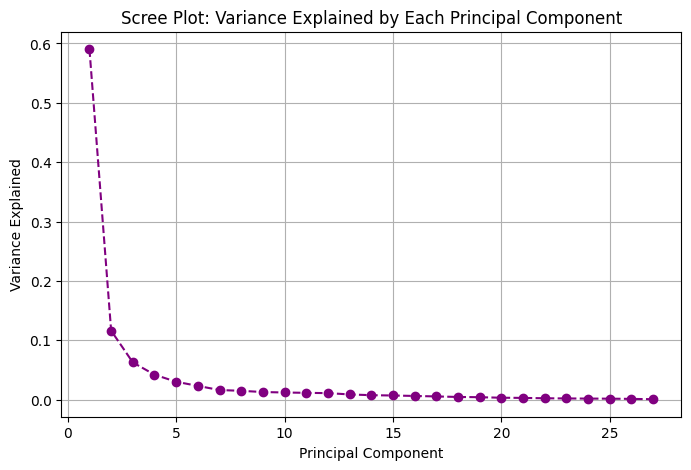

In [41]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Fit PCA
pca = PCA()
pca.fit(returns)

explained_variance = pca.explained_variance_ratio_

# Scree Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o', linestyle='--', color='purple')
plt.title('Scree Plot: Variance Explained by Each Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.grid(True)
plt.show()


<ipython-input-42-9dcf17b8c3b4>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pc1_sorted.values, y=pc1_sorted.index, palette='coolwarm')


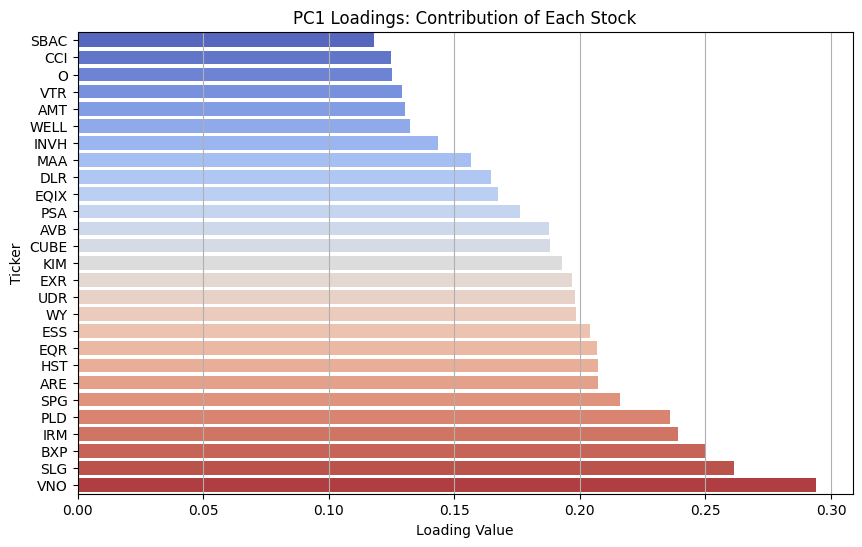

In [42]:
import seaborn as sns

# Get loadings for PC1
pc1_loadings = pd.Series(pca.components_[0], index=returns.columns)

# Sort for better visualization
pc1_sorted = pc1_loadings.sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=pc1_sorted.values, y=pc1_sorted.index, palette='coolwarm')
plt.title('PC1 Loadings: Contribution of Each Stock')
plt.xlabel('Loading Value')
plt.ylabel('Ticker')
plt.grid(True, axis='x')
plt.show()


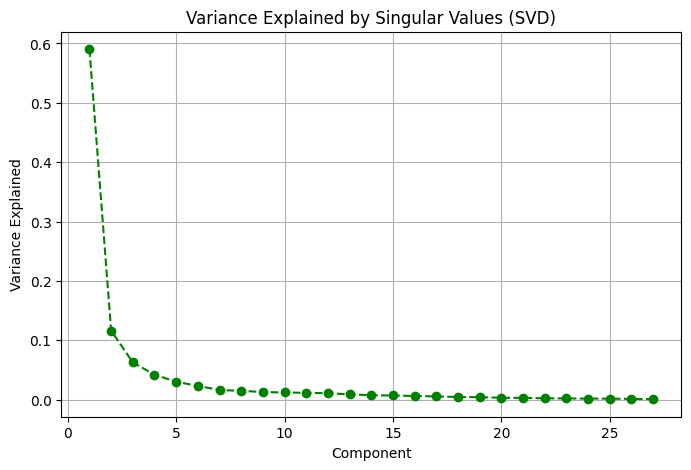

In [43]:
from numpy.linalg import svd

U, S, VT = svd(returns - returns.mean(), full_matrices=False)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(S)+1), S**2 / np.sum(S**2), marker='o', linestyle='--', color='green')
plt.title('Variance Explained by Singular Values (SVD)')
plt.xlabel('Component')
plt.ylabel('Variance Explained')
plt.grid(True)
plt.show()


# Why Returns Matter

Returns—especially daily logarithmic or percentage returns—often take precedence over prices in financial research because they are stationary, meaning that their statistical characteristics (mean, variance) do not vary significantly over time.  For time-series modelling, risk analysis, and portfolio optimisation, this makes them appropriate.  Direct price analysis would confuse value and time impacts, but returns separate the rate of change, which simplifies comparisons and aggregates across assets.

We first computed daily returns, which represent the relative price movement of each company, in order to analyse XLRE's top 30 holdings.  Modern portfolio theory is based on the understanding of covariances, or how stocks move together, which is provided by these return series.

# PCA vs. SVD

Two closely comparable linear algebraic methods for reducing dimensionality and identifying prominent patterns in data are Principal Component Analysis (PCA) and Singular Value Decomposition (SVD).

 To generate eigenvectors (principal components) and eigenvalues (variance explained by each component), PCA breaks down the data's covariance matrix.  These orthogonal components identify the dataset's highest variance directions.


The original (mean-centered) data matrix is factorised into three matrices, U, S, and V^T, using SVD, instead, where:

 The time-corresponding left singular vectors are contained in U.

 The scaled square roots of the eigenvalues, or singular values, are included in S.

 PCA eigenvectors align with the right singular vectors found in V^T.

 Under the hood, PCA is frequently performed using SVD in reality, particularly for sparse or huge datasets.


## What the Eigenvectors, Eigenvalues, and Singular Values Tell Us

# In our XLRE dataset:

The weights that make up uncorrelated synthetic portfolios are known as eigenvectors, or principal components, and each one explains a distinct mode of return variation.  The first component, for example, may be a representation of the real estate industry's entire market movement, where macroeconomic variables like interest rates cause all equities to move in tandem.


The variance that each principle component explains is represented by its eigenvalue.  Since XLRE is a very uniform sector, a sharp decline in values suggests that a small number of factors can account for the majority of the variance.


The SVD singular values represent the magnitude of each component in the transformation of the data.  They rate each major direction's significance.  The covariance matrix's eigenvalues are calculated by dividing the square of each unique value by the total number of observations.


# Interpretation for This Data

We can focus on main drivers and de-noise the data by using PCA to the returns of XLRE's assets.  If the first component accounts for more than 60% of the variance, we may conclude that the sector swings mainly in tandem, driven by common variables like housing demand and interest rates.  Subsector behaviour or stock-specific peculiarities may be captured by the following elements (e.g., REITs vs. construction enterprises).

We can already tell how "connected" the assets are from the covariance matrix we computed before to PCA.  This is converted into an uncorrelated basis via PCA, which facilitates the independent modelling of risks and returns.

Lastly, SVD adds computational robustness and validates the PCA results.  Because of its speed and numerical stability, SVD is recommended for large-scale financial datasets, such as thousands of stocks.